In [1]:
#plantilla

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
datos=np.loadtxt('/Users/usuario-mac/Desktop/CLASES/2021-1/Programacion/semana15/Datos_Peso.dat')

#print(datos)

In [4]:
#acceder a los datos necesarios

peso=datos[:,0]
altura=datos[:,1]
genero=datos[:,2]
edad=datos[:,3]

print(len(peso))
print(np.mean(peso),np.std(peso))
print(np.min(peso),np.max(peso))

184
60.509239130434786 15.906345174564203
13.0 106.0


Text(0.5, 0, 'peso')

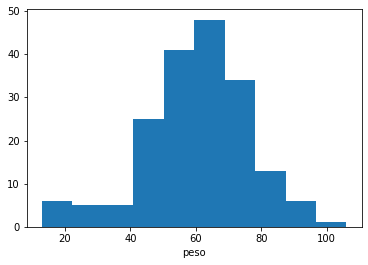

In [5]:
plt.hist(peso)
plt.xlabel('peso')

31.63586956521739 15.94123093769969


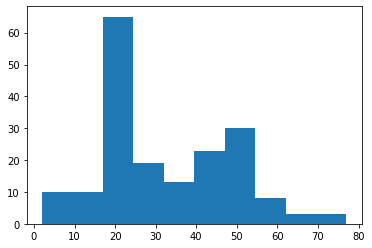

In [6]:
plt.hist(edad)
print(np.mean(edad),np.std(edad))

In [7]:
#discriminar mis datos por genero: mujeres=0, hombres=1
mujeres0=genero==0
hombre0=genero==1

mujeres=genero[mujeres0]
hombres=genero[hombre0]

#print(mujeres0)
print(len(mujeres),len(hombres))


111 73


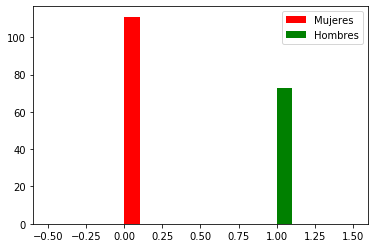

In [8]:
plt.hist(mujeres,label='Mujeres',color='r')
plt.hist(hombres,label='Hombres',color='g')
plt.legend()
plt.savefig('./hist_genero.png')

In [9]:
#clasificar niños de adultos ya que el IMC para niños-adolecentes es diferente al de los adultos
#niños-adolecentes=2-19 años

ninos0=edad<=19 #definicion niños
adultos0= edad>19

ninos=edad[ninos0]
adultos=edad[adultos0]

print(len(ninos),len(adultos))

56 128


In [10]:
ninas0=(edad<=19) & (genero==0)
ninas=ninas0[ninas0]
ninosH0=(edad<=19) & (genero==1)
ninosH=ninosH0[ninosH0]

print(len(ninas),len(ninosH))

38 18


In [11]:
mujerA0=(edad>19) & (genero==0)
mujerA=mujerA0[mujerA0]

hombreA0=(edad>19) & (genero==1)
hombreA=hombreA0[hombreA0]

print(len(mujerA),len(hombreA))

73 55


/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:656: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:778: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


Text(0.5, 1.0, 'Histograma por edad y genero')

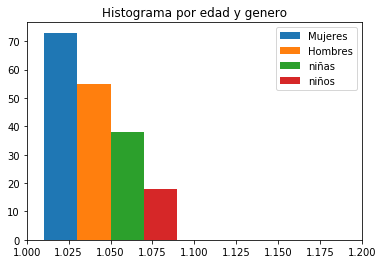

In [12]:
plt.hist([mujerA,hombreA,ninas,ninosH],label=['Mujeres','Hombres','niñas','niños'])
plt.legend()
plt.xlim(1.0,1.2)
plt.title('Histograma por edad y genero')

In [21]:
#IMC para mujeres y hombres (adultos)
# hombre adulto: hombreA0
#mujer adulta: mujerA0

#1. Hombres, IMC=peso/altura^2

pesoH=peso[hombreA0]
alturaH=altura[hombreA0]
edadH=edad[hombreA0]

IMCH=pesoH/(alturaH)**2

print(len(pesoH))
print(np.mean(edadH),np.std(edadH))
print(np.min(edadH),np.max(edadH))
print(np.mean(pesoH),np.std(pesoH))
print(np.mean(alturaH),np.std(alturaH))
print(np.mean(IMCH),np.std(IMCH))

55
36.654545454545456 12.396800440316236
20.0 71.0
72.81818181818181 10.465685764076651
1.7116363636363636 0.06372565164583217
24.882999488567474 3.6074027954022254


In [23]:
#2. Mujeres 

pesoM=peso[mujerA0]
alturaM=altura[mujerA0]
edadM=edad[mujerA0]

IMCM=pesoM/(alturaM)**2

print(len(pesoM))
print(np.mean(edadM),np.std(edadM))
print(np.min(edadM),np.max(edadM))
print(np.mean(pesoM),np.std(pesoM))
print(np.mean(alturaM),np.std(alturaM))
print(np.mean(IMCM),np.std(IMCM))

73
40.43835616438356 14.28380278340956
20.0 77.0
59.92739726027397 9.495857211681841
1.5857534246575342 0.06529003381580514
23.81482742782564 3.429186132868591


In [29]:
#Clasificacion del IMC para hombres

#Desnutricion
desnutricionH= (IMCH<20)
print(len(IMCH[desnutricionH]))
print('ojo, adulto en desnutrición', len(IMCH[desnutricionH]),edadH[desnutricionH])

#Normal
normalH= (IMCH>=20) & (IMCH<=24.9)
print('Felicitaciones, buenos habitos de nutricion', len(IMCH[normalH]))

#Sobre Peso
sobreP=(IMCH>=25) & (IMCH<=29.9)
print('ojo, sobre peso detectado, hay que cuidarse', len(IMCH[sobreP]))

#obesidad
obesidad=(IMCH>=30) & (IMCH<=40)
print('ojo, Obesidad', len(IMCH[obesidad]))

#Obesidad Grave
obesidad_G=(IMCH>40)
print('ojo, Obesidad Grave', len(IMCH[obesidad_G]))

3
ojo, adulto en desnutrición 3 [23. 23. 21.]
Felicitaciones, buenos habitos de nutricion 26
ojo, sobre peso detectado, hay que cuidarse 21
ojo, Obesidad 3
ojo, Obesidad Grave 0


In [33]:
#IMC Mujeres

#Desnutricion
desnutricionM= (IMCM<19)
print('ojo, adulto Mujer en desnutrición', len(IMCM[desnutricionM]),edadM[desnutricionM])

#Normal
normalM= (IMCM>=19) & (IMCM<=23.9)
print('Felicitaciones, buenos habitos de nutricion', len(IMCM[normalM]))

#sobre peso
sobreP_M=(IMCM>=24) & (IMCM<=27)
print('ojo, sobre peso detectado, hay que cuidarse', len(IMCM[sobreP_M]))

#obesidad
obesidadM=(IMCM>=27) & (IMCM<=32)
print('ojo, Obesidad', len(IMCM[obesidadM]))

#obesidad Grave
obesidad_GM=(IMCM>32)
print('ojo, Obesidad Grave', len(IMCM[obesidad_GM]))

ojo, adulto Mujer en desnutrición 5 [21. 75. 24. 20. 20.]
Felicitaciones, buenos habitos de nutricion 37
ojo, sobre peso detectado, hay que cuidarse 18
ojo, Obesidad 10
ojo, Obesidad Grave 3


Text(0, 0.5, 'IMC de mujeres')

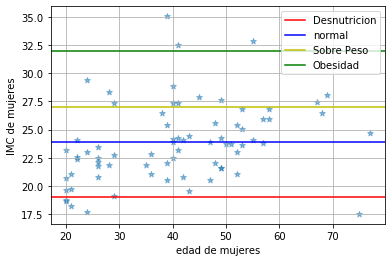

In [58]:
#grafica de genero vs IMC
#1. Mujeres, edad vs IMC

plt.scatter(edadM,IMCM,marker='*',alpha=0.5)
plt.grid()
plt.axhline(y=19,color='r',linestyle='-',label='Desnutricion')
plt.axhline(y=23.9,color='b', linestyle='-',label='normal')
plt.axhline(y=27,color='y', linestyle='-',label='Sobre Peso')
plt.axhline(y=32,color='g', linestyle='-',label='Obesidad')
plt.legend()
plt.xlabel('edad de mujeres')
plt.ylabel('IMC de mujeres')

Text(0, 0.5, 'IMC de Hombres')

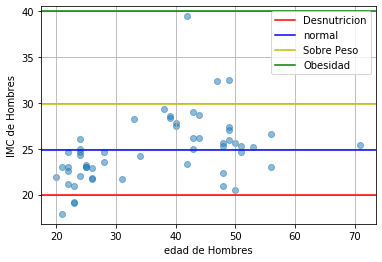

In [59]:
#grafica de genero vs IMC
#2. Hombres, edad vs IMC

plt.scatter(edadH,IMCH,marker='o',alpha=0.5)
plt.grid()
plt.axhline(y=20,color='r',linestyle='-',label='Desnutricion')
plt.axhline(y=24.9,color='b', linestyle='-',label='normal')
plt.axhline(y=29.9,color='y', linestyle='-',label='Sobre Peso')
plt.axhline(y=40,color='g', linestyle='-',label='Obesidad')
plt.legend()
plt.xlabel('edad de Hombres')
plt.ylabel('IMC de Hombres')

Text(0.5, 0, 'edad de Mujeres')

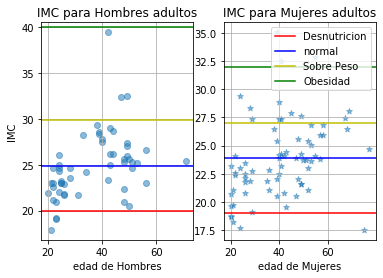

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(edadH,IMCH,marker='o',alpha=0.5)
ax1.grid()
ax1.axhline(y=20,color='r',linestyle='-',label='Desnutricion')
ax1.axhline(y=24.9,color='b', linestyle='-',label='normal')
ax1.axhline(y=29.9,color='y', linestyle='-',label='Sobre Peso')
ax1.axhline(y=40,color='g', linestyle='-',label='Obesidad')
#ax1.legend()
ax1.set_title('IMC para Hombres adultos')
ax1.set_xlabel('edad de Hombres')
ax1.set_ylabel('IMC')


ax2.scatter(edadM,IMCM,marker='*',alpha=0.5)
ax2.grid()
ax2.axhline(y=19,color='r',linestyle='-',label='Desnutricion')
ax2.axhline(y=23.9,color='b', linestyle='-',label='normal')
ax2.axhline(y=27,color='y', linestyle='-',label='Sobre Peso')
ax2.axhline(y=32,color='g', linestyle='-',label='Obesidad')
ax2.legend()
ax2.set_title('IMC para Mujeres adultos')
ax2.set_xlabel('edad de Mujeres')

